In [1]:
import np as np
import pandas as pd
import seaborn.objects as so
from matplotlib import pyplot as plt

%matplotlib inline

In [269]:
df_train = pd.read_csv("./../data/train.csv")
df_test_nolabel = pd.read_csv("./../data/test_nolabel.csv")
df_sample_submission = pd.read_csv("./../data/sample_submission.csv")

/var/folders/9r/sd92rccj2_xbk8nkg4v7dcm00000gn/T/ipykernel_24446/1911879165.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv("./../data/train.csv")


In [270]:
df_train

,id,LoanNr_ChkDgt,Name,City,State,Bank,BankState,ApprovalDate,ApprovalFY,NoEmp,...,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,Accept
0,b353a0b461c,3354343008,"TOGETHER GARGOYLES, INC.",BROOKLYN,NY,JPMORGAN CHASE BANK NATL ASSOC,NY,21-Dec-88,1989,20,...,0,0,0,0,N,N,30-Apr-89,"$350,000.00",$0.00,1
1,cca24bbcc48,2349745003,LAWRENCE K. ALTHISER DBA LARRY,HARTWICK,NY,CITIZENS BANK NATL ASSOC,RI,23-Mar-07,2007,3,...,1,4,0,2,N,N,30-Apr-07,"$35,000.00",$0.00,1
2,e60644381ce,6007284009,TAAMEER CONSTRUCTION INC,BROOKLYN (BOROUGH OF NEW YORK),NY,JPMORGAN CHASE BANK NATL ASSOC,IL,9-Jan-03,2003,5,...,0,5,1,1,0,N,31-Jan-03,"$50,000.00",$0.00,1
3,ffca41a2760,6047703002,"CENTRAL CONTROL SYSTEMS, INC.",SYRACUSE,NY,MANUFACTURERS & TRADERS TR CO,NY,10-Nov-93,1994,25,...,0,0,1,0,N,N,31-Jan-94,"$190,000.00",$0.00,1
4,79e48255003,6590164004,METRO SALON,ROCHESTER,NY,MANUFACTURERS & TRADERS TR CO,NY,14-Aug-03,2003,6,...,0,0,1,1,0,Y,30-Sep-03,"$30,000.00",$0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40380,8db591edafe,1238924005,"NBFD, INC.",OLEAN,NY,COMMUNITY BANK NATL ASSOC,NY,15-May-97,1997,25,...,0,0,1,0,N,Y,3-Jun-97,"$50,000.00",$0.00,1
40381,e1e96f4af51,3681885006,Altman Stage Lighting Co.,YONKERS,NY,EH NATIONAL BANK,CA,7-Oct-09,2010,100,...,10,100,0,1,N,N,7-Oct-09,"$1,666,600.00",$0.00,1
40382,29aabac46d9,1497375007,Paws & Claws Pet Boutique LLC,SEAFORD,NY,HSBC BK USA NATL ASSOC,NY,13-Oct-05,2006,1,...,0,1,0,1,N,N,30-Apr-06,"$25,000.00",$0.00,1
40383,2ed947e57f5,1757175003,Bay Medical Supplies Inc,BROOKLYN,NY,HSBC BK USA NATL ASSOC,NY,10-Apr-06,2006,1,...,0,1,0,1,Y,N,31-May-06,"$73,363.00",$0.00,1


In [271]:
df_train["Accept"].unique()

array([1, 0])

In [272]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df_train[df_train["Accept"] == 1]
df_minority = df_train[df_train["Accept"] == 0]

# Downsample majority class
df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=42)

# Combine minority class with downsampled majority class
df_train_resampled = np.concatenate((df_majority_downsampled, df_minority), axis=0)
df_train_resampled = pd.DataFrame(df_train_resampled, columns=df_train.columns)

df_train_resampled

,id,LoanNr_ChkDgt,Name,City,State,Bank,BankState,ApprovalDate,ApprovalFY,NoEmp,...,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,Accept
0,ead746b9287,5355743000,JEBB PRODUCTS INC.,BROOKLYN,NY,BANK OF AMERICA NATL ASSOC,NY,30-Nov-92,1993,1,...,0,0,1,0,N,N,31-Jul-93,"$100,000.00",$0.00,1
1,39d633cdadc,2231535004,Angie's Grand Salon Inc.,EASTCHESTER,NY,JPMORGAN CHASE BANK NATL ASSOC,IL,22-Jan-07,2007,4,...,1,5,0,1,N,N,31-Jan-07,"$25,000.00",$0.00,1
2,8a6734e9b88,1715185008,"G & G WINDOW REPAIR, INC.",RUSH,NY,CITIZENS BANK NATL ASSOC,RI,16-Mar-06,2006,8,...,0,8,0,2,N,N,31-Mar-06,"$65,000.00",$0.00,1
3,9457289462d,2821146001,CLIQUE LIMOUSINE,BAY SHORE,NY,"CITIBANK, N.A.",SD,31-May-07,2007,2,...,0,2,1,1,Y,N,30-Jun-07,"$43,000.00",$0.00,1
4,778d511d53a,7815113000,JOSEPH & ROSEMARIE TRANCHINA,BROOKLYN,NY,CAPITAL ONE NATL ASSOC,VA,18-Nov-94,1995,12,...,0,0,1,0,N,N,30-Mar-95,"$560,000.00",$0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16443,995306ab69a,7353204004,ALLEGANY DOOR & MILLWORK LLC,SCIO,NY,STEUBEN TRUST COMPANY,NY,14-Apr-04,2004,5,...,0,0,1,2,N,N,30-Nov-04,"$290,000.00",$0.00,0
16444,0d2f90b17d4,5517584000,ORFFEO PRINTING COMPANY INC,DEPEW,NY,KEYBANK NATIONAL ASSOCIATION,OH,9-Jul-02,2002,20,...,2,20,1,1,0,N,31-Aug-02,"$790,500.00",$0.00,0
16445,3ecfbf83692,1963555000,MICHELLE RAGO LTD,NEW YORK,NY,CAPITAL ONE NATL ASSOC,VA,10-Aug-06,2006,2,...,2,4,0,1,N,N,31-Aug-06,"$100,000.00",$0.00,0
16446,a8cc6a0e79b,6651024002,RESEARCH & GRANTS SERVICES INC,NEW YORK,NY,JPMORGAN CHASE BANK NATL ASSOC,IL,4-Sep-03,2003,5,...,2,5,1,1,Y,N,30-Sep-03,"$50,000.00",$0.00,0


In [456]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, LabelBinarizer, OrdinalEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ["NoEmp", "CreateJob", "RetainedJob", "ApprovalFY"]),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ["Name", "City", "Bank"]),
    ])
preprocessor_label = LabelEncoder()

preprocessor.fit(df_train)
preprocessor_label.fit(df_train_resampled["Accept"])

ValueError: could not convert string to float: '1976A'

In [457]:
X = preprocessor.transform(df_train_resampled)
y = preprocessor_label.transform(df_train_resampled["Accept"])

AttributeError: 'ColumnTransformer' object has no attribute 'transformers_'

In [458]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [459]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=80, n_estimators=10, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=80, n_estimators=10, random_state=42)

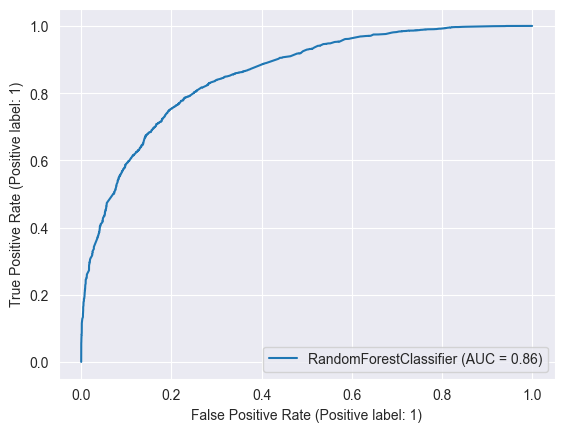

In [460]:
from sklearn.metrics import RocCurveDisplay, accuracy_score

RocCurveDisplay.from_estimator(clf, X_train, y_train)

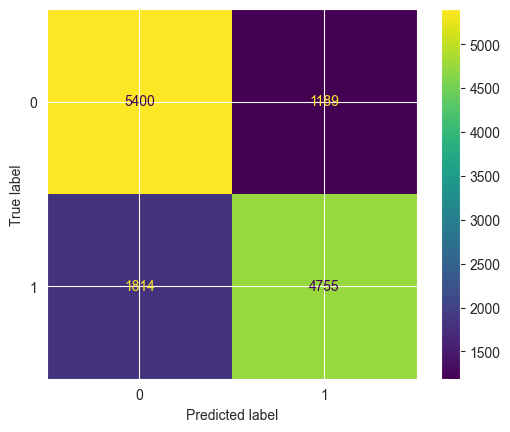

In [461]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix(y_train, clf.predict(X_train))

ConfusionMatrixDisplay.from_estimator(clf, X_train, y_train)

In [462]:
import numpy as np

np.unique(clf.predict(X_train))

array([0, 1])

In [463]:
accuracy_score(y_train, clf.predict(X_train))

0.7717738258093936

In [464]:
confusion_matrix(y_train, clf.predict(X_train))

array([[5400, 1189],
       [1814, 4755]])

In [465]:
df_test_nolabel["Accept"] = df_sample_submission["Accept"]

In [466]:
df_test_nolabel

,id,LoanNr_ChkDgt,Name,City,State,Bank,BankState,ApprovalDate,ApprovalFY,NoEmp,...,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,Accept
0,63ef5dfc62f,1787644007,ERIC P. HAILE,STAFFORD,NY,MANUFACTURERS & TRADERS TR CO,NY,16-Jan-98,1998,1,...,0,0,1,0,N,Y,3-Apr-98,"$35,000.00",$0.00,0
1,65ee0569c05,6209123009,"TANNING BED, LTD.",WEST SENECA,NY,MANUFACTURERS & TRADERS TR CO,NY,9-Feb-94,1994,81,...,0,0,1,0,N,N,31-Jul-94,"$145,000.00",$0.00,0
2,19058f4da52,5033174010,BREITO COMPUTER SOLUTIONS INC,WOOD HAVEN (WOODHAVEN),NY,BANK OF AMERICA NATL ASSOC,RI,7-Nov-01,2002,4,...,1,5,1,1,Y,N,31-Dec-01,"$52,174.00",$0.00,0
3,a0f1299afe4,1578685008,Rasol Food Corporation,BRONX,NY,JPMORGAN CHASE BANK NATL ASSOC,IL,13-Dec-05,2006,6,...,3,6,0,1,Y,N,31-Jan-06,"$194,316.00",$0.00,0
4,e47da0be9fc,7146054004,MCKAY ARCHITECTURE AND DESIGN,NEW YORK,NY,FLUSHING BANK,NY,30-Jan-04,2004,3,...,0,3,1,1,Y,N,29-Feb-04,"$75,000.00",$0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,78c2f0067d8,5583904009,NASCO STONEWORKS INC,HUNTINGTON STATION (HUNTINGTON,NY,BANK OF AMERICA NATL ASSOC,RI,2-Aug-02,2002,2,...,0,2,1,1,0,N,31-Oct-02,"$30,000.00",$0.00,1
7046,279c7d23eb7,3264695007,"Yaworski's, Inc.",ROME,NY,FIRST NIAGARA BANK NATL ASSOC,NY,14-Nov-08,2009,5,...,0,5,0,1,N,N,31-Dec-08,$18.00,$0.00,0
7047,d67af0ec109,1890735004,RAWSON VALLEY FARMS LANDSCAPES,WALWORTH,NY,CITIZENS BANK NATL ASSOC,RI,23-Jun-06,2006,1,...,0,1,0,2,Y,N,31-Aug-06,"$23,762.00",$0.00,0
7048,7d2e8114e9a,8939464003,RAJ REALTY PA LLC,BROOKLYN,NY,FIRST NIAGARA BANK NATL ASSOC,NY,20-Jun-05,2005,2,...,0,2,1,1,Y,N,31-Mar-08,"$30,000.00",$0.00,1


In [467]:
df_test_nolabel.dropna(inplace=True, axis=0)

In [468]:
X_validation = preprocessor.transform(df_test_nolabel)
y_validation_pred = clf.predict(X_validation)
y_validation_true = preprocessor_label.transform(df_test_nolabel["Accept"])

AttributeError: 'ColumnTransformer' object has no attribute 'transformers_'

In [469]:
accuracy_score(y_validation_true, y_validation_pred)

0.5084406294706724

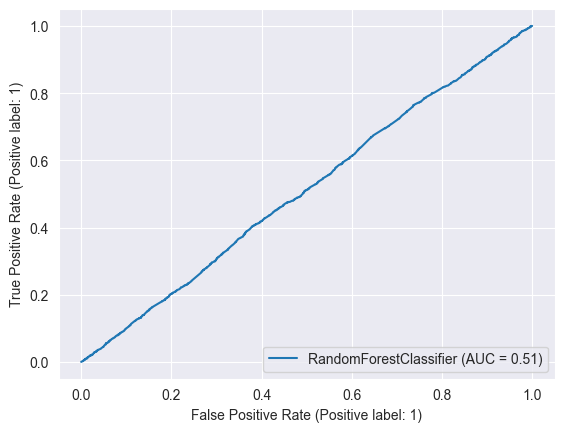

In [470]:
RocCurveDisplay.from_estimator(clf, X_validation, y_validation_true)